<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#data" data-toc-modified-id="data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#modeling" data-toc-modified-id="modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>modeling</a></span></li><li><span><a href="#X(data),-Y(target)-합친-후-train-test-split" data-toc-modified-id="X(data),-Y(target)-합친-후-train-test-split-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>X(data), Y(target) 합친 후 train test split</a></span></li><li><span><a href="#predict" data-toc-modified-id="predict-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>predict</a></span></li><li><span><a href="#visualization" data-toc-modified-id="visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>visualization</a></span></li><li><span><a href="#logit" data-toc-modified-id="logit-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>logit</a></span></li></ul></div>

[결측치 처리 기법 listwise](https://seebear.tistory.com/27) <br>
[DT와 RF 차이](https://ssoondata.tistory.com/14) <br>


In [38]:
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris


import numpy as np
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# data

In [6]:
iris = load_iris()

In [8]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# modeling
[iris rf clf 예시](https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c)

In [10]:
# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

# X(data), Y(target) 합친 후 train test split

In [55]:
iris.data.shape
iris.target.shape

data = pd.DataFrame(iris.data, columns = ['X0', 'X1', 'X2', 'X3'])
target = pd.DataFrame(iris.target, columns = ['target'])

# data, target 합치기
data_all = pd.merge(data, target, left_index = True, right_index = True)


# train, test split
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_all, test_size = 0.2, stratify = data_all.target) # stratify : 균등 분할
                                                                                      # 이래버리면 data leakage이긴 함.
# X, Y 분리
X_train, Y_train = train.iloc[:, :4], train.target
X_test, Y_test = test.iloc[:, :4], test.target

(150, 4)

(150,)

# predict

In [64]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

## 점수 함수
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_clf_eval(Y_test, pred=None, pred_proba=None):
    print('오차행렬 \n', confusion_matrix(Y_test, Y_pred))
    print('정확도 :', accuracy_score(Y_test, Y_pred))
#     print('정밀도 : ',precision_score(Y_test, Y_pred))    # class 비율 균일하게 분할 시 작동 안함.
#     print('재현율 :', recall_score(Y_test, Y_pred))    # class 비율 균일하게 분할 시 작동 안함.
#     print('f1 score :', f1_score(Y_test, Y_pred))    # class 비율 균일하게 분할 시 작동 안함.
#     print('roc auc score :', roc_auc_score(Y_test, Y_pred))


get_clf_eval(Y_test)

# print(f'Y_train : {Y_train}')
print(f'Y_test : {np.array(Y_test)}')
print(f'Y_pred : {Y_pred}')

RandomForestClassifier(n_estimators=10)

오차행렬 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
정확도 : 0.9666666666666667
Y_test : [1 0 1 2 1 2 1 1 2 1 0 2 2 1 0 2 0 0 1 0 2 2 0 2 2 0 0 1 1 0]
Y_pred : [1 0 1 2 1 2 1 1 2 1 0 2 2 1 0 2 0 0 1 0 2 2 0 2 2 0 0 1 2 0]


# visualization

In [69]:
iris.feature_names
iris.target_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

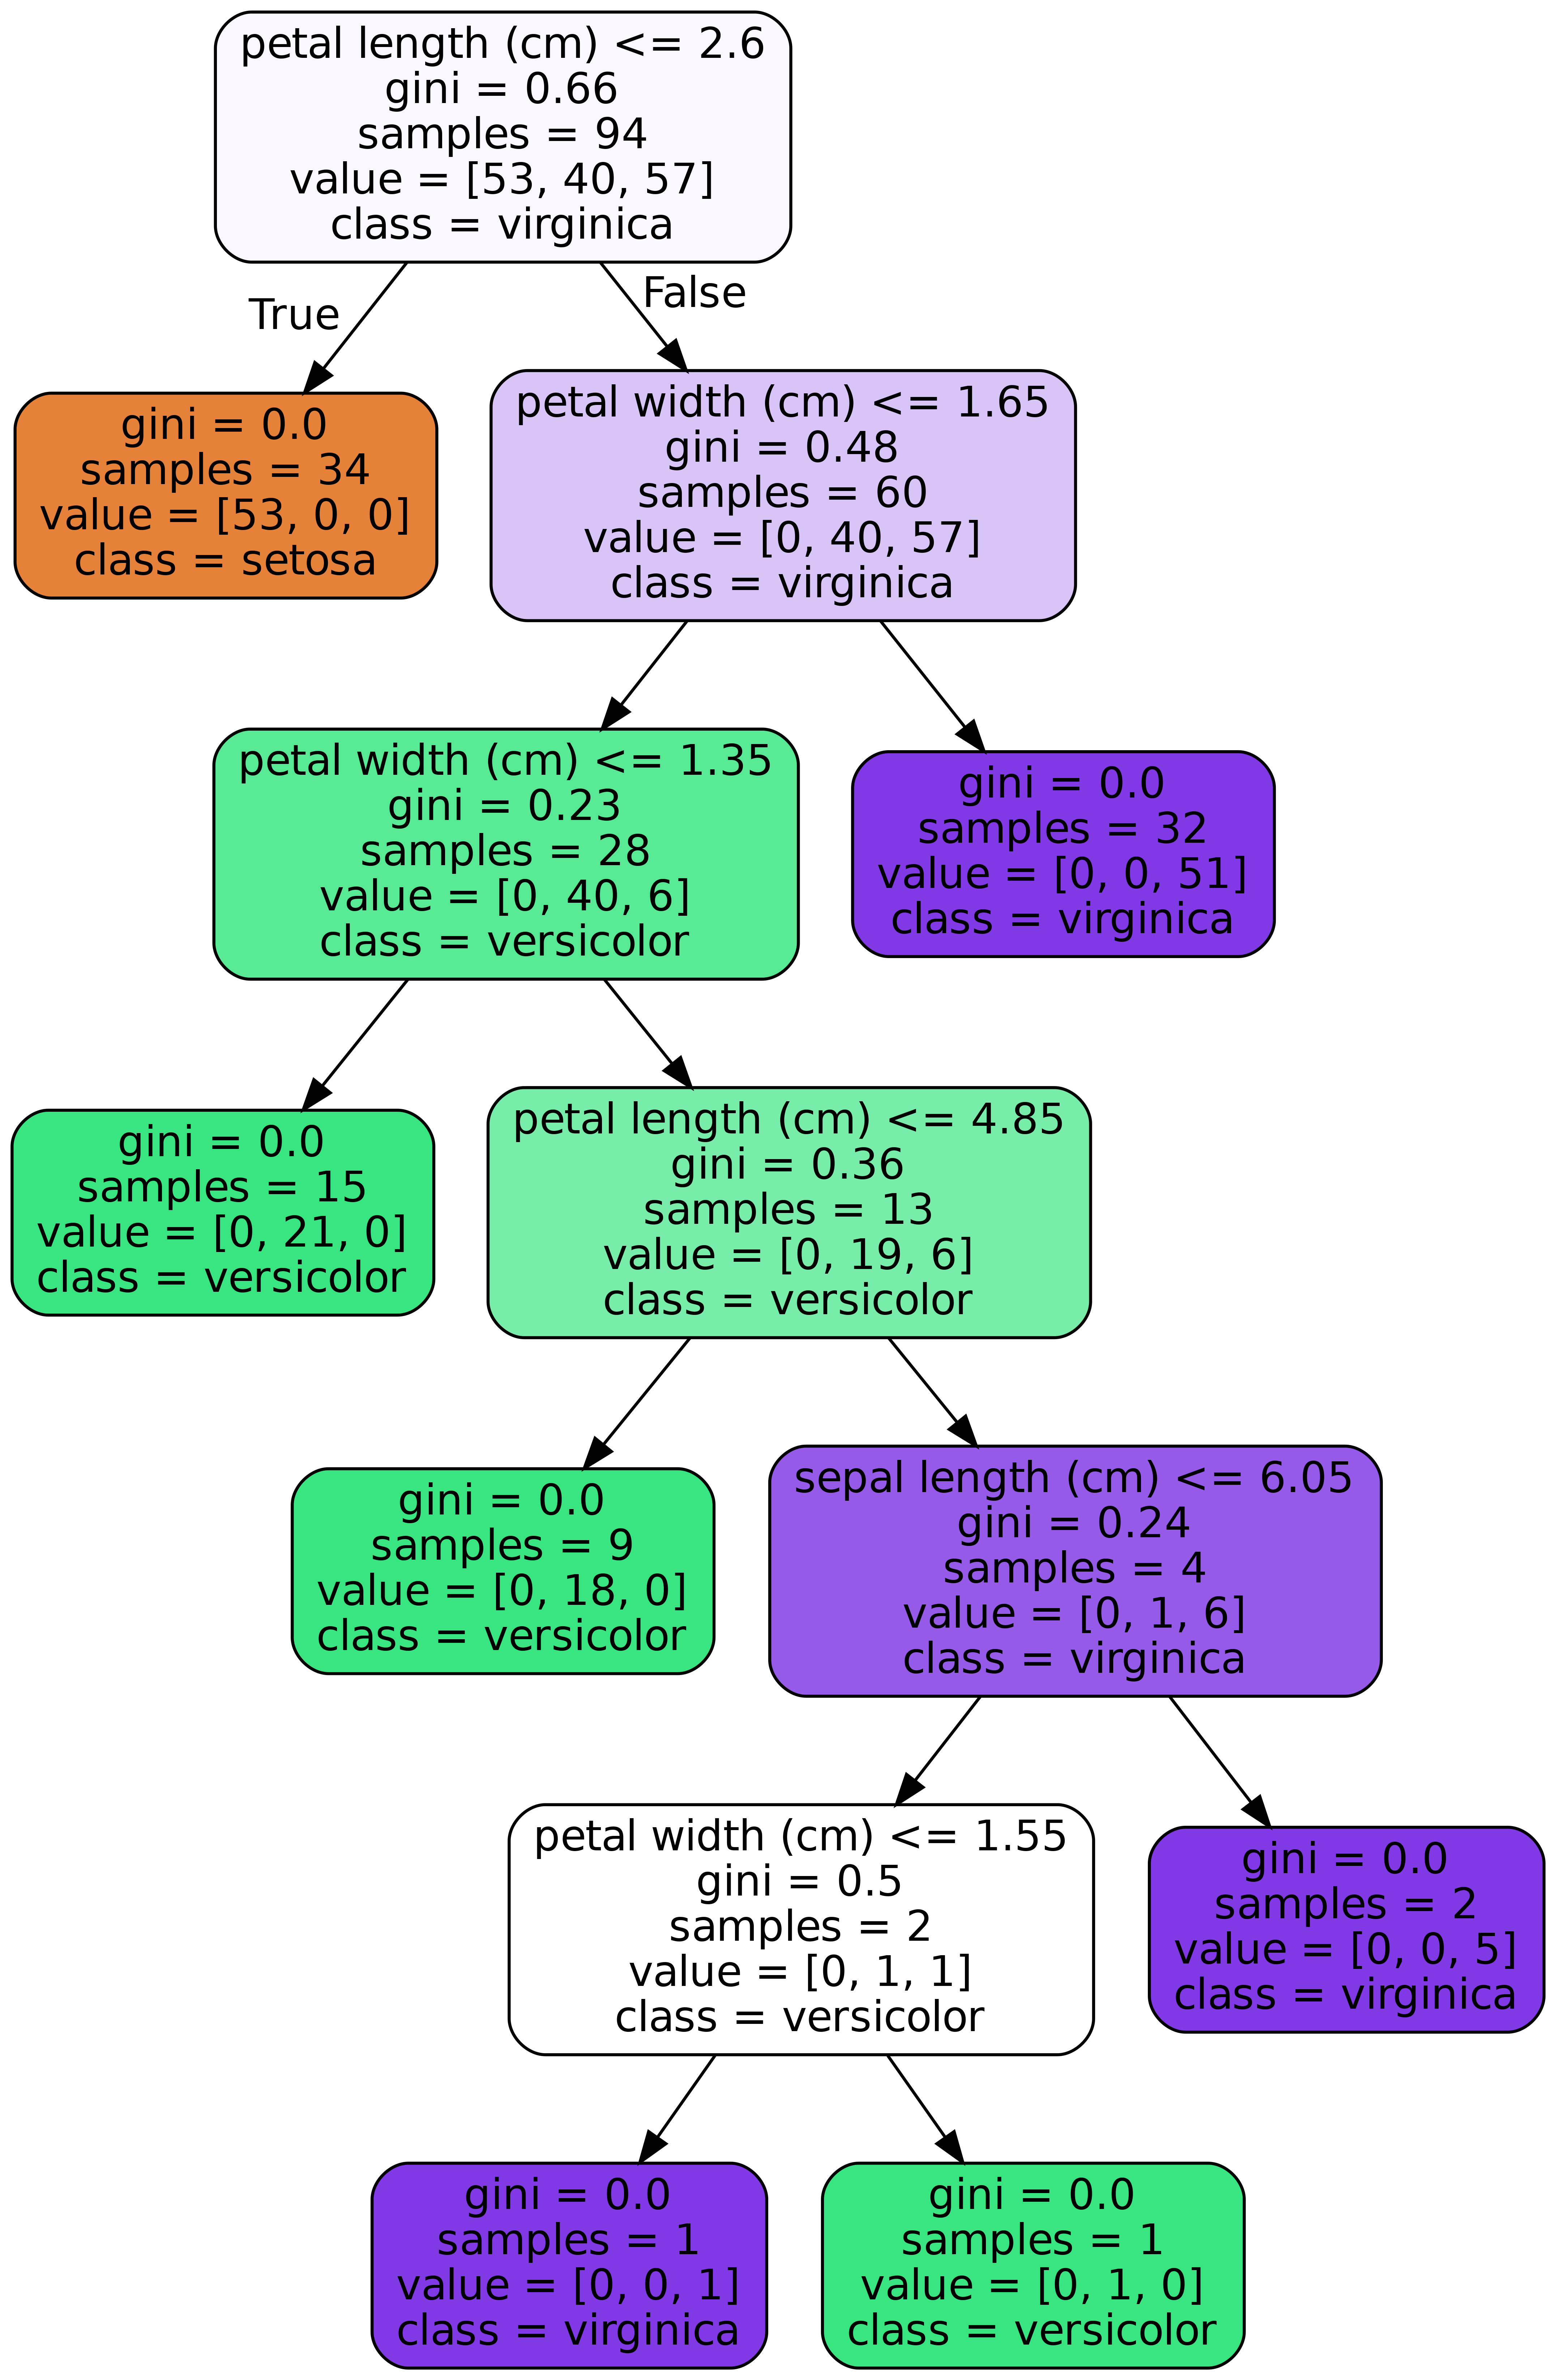

In [12]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# logit

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

get_clf_eval(Y_test)

print(f'Y_test : {np.array(Y_test)}')
print(f'Y_pred : {Y_pred}')

LogisticRegression()

오차행렬 
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
정확도 : 0.9666666666666667
Y_test : [1 0 1 2 1 2 1 1 2 1 0 2 2 1 0 2 0 0 1 0 2 2 0 2 2 0 0 1 1 0]
Y_pred : [1 0 1 2 1 2 1 1 2 1 0 2 2 1 0 2 0 0 1 0 2 2 0 2 2 0 0 1 2 0]
